# Transfer Learning MNIST

* Train a simple convnet on the MNIST dataset the first 5 digits [0..4].
* Freeze convolutional layers and fine-tune dense layers for the classification of digits [5..9].

## 1. Import necessary libraries for the model

In [1]:
import tensorflow as tf
import numpy as np
import keras
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

tf.reset_default_graph()
tf.set_random_seed(42)

Using TensorFlow backend.


In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Import MNIST data and create 2 datasets with one dataset having digits from 0 to 4 and other from 5 to 9 

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
print ("x_train row count: ", len(x_train))
print ("y_train row count: ", len(y_train))
print ("x_test row count: ", len(x_test))
print ("y_test row count: ", len(y_test))

x_train row count:  60000
y_train row count:  60000
x_test row count:  10000
y_test row count:  10000


In [0]:
x_train0to4 = x_train[y_train<=4]
y_train0to4 = y_train[y_train<=4]
x_train5to9 = x_train[y_train>4]
y_train5to9 = y_train[y_train>4]

In [6]:
print ("x_train0to4 row count: ", len(x_train0to4))
print ("y_train0to4 row count: ", len(y_train0to4))
print ("x_train5to9 row count: ", len(x_train5to9))
print ("y_train5to9 row count: ", len(y_train5to9))

x_train0to4 row count:  30596
y_train0to4 row count:  30596
x_train5to9 row count:  29404
y_train5to9 row count:  29404


In [0]:
x_test0to4 = x_test[y_test<=4]
y_test0to4 = y_test[y_test<=4]
x_test5to9 = x_test[y_test>4]
y_test5to9 = y_test[y_test>4]

In [8]:
print ("x_test0to4 row count: ", len(x_test0to4))
print ("y_test0to4 row count: ", len(y_test0to4))
print ("x_test5to9 row count: ", len(x_test5to9))
print ("y_test5to9 row count: ", len(y_test5to9))

x_test0to4 row count:  5139
y_test0to4 row count:  5139
x_test5to9 row count:  4861
y_test5to9 row count:  4861


## 3. Print x_train, y_train, x_test and y_test for both the datasets

x_train0to4 and y_train0to4


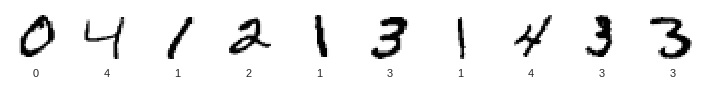

In [9]:
import matplotlib.pyplot as plt
import numpy as np

print("x_train0to4 and y_train0to4")

fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 10))

for i, ax in enumerate(axes.flat, start=0):
    ax.imshow(x_train0to4[i])
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(y_train0to4[i])
    
plt.tight_layout()
plt.show()

x_train5to9 and y_train5to9


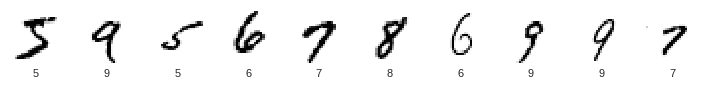

In [10]:
print("x_train5to9 and y_train5to9")

fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 10))

for i, ax in enumerate(axes.flat, start=0):
    ax.imshow(x_train5to9[i])
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(y_train5to9[i])
    
plt.tight_layout()
plt.show()

x_test0to4 and y_test0to4


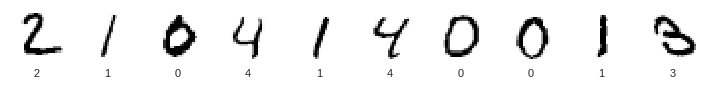

In [11]:
print("x_test0to4 and y_test0to4")

fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 10))

for i, ax in enumerate(axes.flat, start=0):
    ax.imshow(x_test0to4[i])
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(y_test0to4[i])
    
plt.tight_layout()
plt.show()

x_test5to9 and y_test5to9


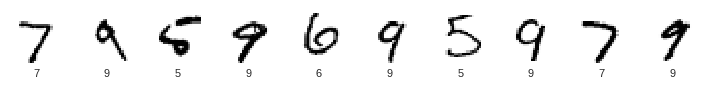

In [12]:
print("x_test5to9 and y_test5to9")

fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 10))

for i, ax in enumerate(axes.flat, start=0):
    ax.imshow(x_test5to9[i])
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(y_test5to9[i])
    
plt.tight_layout()
plt.show()

## ** 4. Let us take only the dataset (x_train, y_train, x_test, y_test) for Integers 0 to 4 in MNIST **
## Reshape x_train and x_test to a 4 Dimensional array (channel = 1) to pass it into a Conv2D layer

In [0]:
x_train0to4 = x_train0to4.reshape(len(x_train0to4),28,28,1)
x_train5to9 = x_train5to9.reshape(len(x_train5to9),28,28,1)
x_test0to4 = x_test0to4.reshape(len(x_test0to4),28,28,1)
x_test5to9 = x_test5to9.reshape(len(x_test5to9),28,28,1)

## 5. Normalize x_train and x_test by dividing it by 255

In [0]:
x_train0to4 = x_train0to4/255
x_test0to4 = x_test0to4/255

## 6. Use One-hot encoding to divide y_train and y_test into required no of output classes

In [0]:
y_train0to4 = keras.utils.to_categorical(y_train0to4, 5)
y_test0to4 = keras.utils.to_categorical(y_test0to4, 5)

## 7. Build a sequential model with 2 Convolutional layers with 32 kernels of size (3,3) followed by a Max pooling layer of size (2,2) followed by a drop out layer to be trained for classification of digits 0-4  

In [16]:
#Initialize the model
model = Sequential()

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1),name='conv_1'))

#Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(32, (3, 3), activation='relu',name='conv_2'))

#Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2),name='max_1'))

#Apply Dropout with 0.25 probability 
model.add(Dropout(0.25,name='drop_1'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


## 8. Post that flatten the data and add 2 Dense layers with 128 neurons and neurons = output classes with activation = 'relu' and 'softmax' respectively. Add dropout layer inbetween if necessary  

In [0]:
#Flatten the layer
model.add(Flatten())

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model.add(Dense(128, activation='relu',name='dense_1'))

#Apply Dropout with 0.5 probability 
model.add(Dropout(0.5,name='drop_2'))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(5, activation='softmax',name='dense_3'))

In [0]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

#To use adam optimizer for learning weights with learning rate = 0.001
optimizer = Adam(lr=0.001)
#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

In [19]:
#Training on the dataset
model.fit(x_train0to4, y_train0to4,
          batch_size=100,
          epochs=20,
          verbose=1,
          validation_data=(x_test0to4, y_test0to4))

Instructions for updating:
Use tf.cast instead.
Train on 30596 samples, validate on 5139 samples
Epoch 1/20
30596/30596 [==============================] - 6s 184us/step - loss: 0.1217 - acc: 0.9623 - val_loss: 0.0175 - val_acc: 0.9949
Epoch 2/20
30596/30596 [==============================] - 4s 120us/step - loss: 0.0354 - acc: 0.9896 - val_loss: 0.0102 - val_acc: 0.9967
Epoch 3/20
30596/30596 [==============================] - 4s 121us/step - loss: 0.0250 - acc: 0.9927 - val_loss: 0.0071 - val_acc: 0.9982
Epoch 4/20
30596/30596 [==============================] - 4s 122us/step - loss: 0.0205 - acc: 0.9931 - val_loss: 0.0067 - val_acc: 0.9973
Epoch 5/20
30596/30596 [==============================] - 4s 121us/step - loss: 0.0176 - acc: 0.9943 - val_loss: 0.0068 - val_acc: 0.9982
Epoch 6/20
30596/30596 [==============================] - 4s 121us/step - loss: 0.0138 - acc: 0.9951 - val_loss: 0.0060 - val_acc: 0.9979
Epoch 7/20
30596/30596 [==============================] - 4s 122us/step - l

## 9. Print the training and test accuracy

In [0]:
predictions_train = model.predict(x_train0to4)
predictions_test = model.predict(x_test0to4)

In [21]:
from sklearn import metrics
print ("Train Accuracy: ", metrics.accuracy_score(np.argmax(y_train0to4, axis=1), np.argmax(predictions_train, axis=1)))

Train Accuracy:  0.9996731598901817


In [22]:
from sklearn.metrics import classification_report

print ("Classification Report for train data")
print(classification_report(np.argmax(y_train0to4, axis=1), np.argmax(predictions_train, axis=1)))

Classification Report for train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       1.00      1.00      1.00      5958
           3       1.00      1.00      1.00      6131
           4       1.00      1.00      1.00      5842

   micro avg       1.00      1.00      1.00     30596
   macro avg       1.00      1.00      1.00     30596
weighted avg       1.00      1.00      1.00     30596



In [23]:
print ("Test Accuracy: ", metrics.accuracy_score(np.argmax(y_test0to4, axis=1), np.argmax(predictions_test, axis=1)))

Test Accuracy:  0.9978595057404164


In [24]:
print ("Classification Report for test data")
print(classification_report(np.argmax(y_test0to4, axis=1), np.argmax(predictions_test, axis=1)))

Classification Report for test data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      0.99      1.00      1032
           3       1.00      1.00      1.00      1010
           4       1.00      1.00      1.00       982

   micro avg       1.00      1.00      1.00      5139
   macro avg       1.00      1.00      1.00      5139
weighted avg       1.00      1.00      1.00      5139



## 10. Make only the dense layers to be trainable and convolutional layers to be non-trainable

In [25]:
#Freezing layers in the model which don't have 'dense' in their name
for layer in model.layers:
  if('dense' not in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False

#Module to print colourful statements
from termcolor import colored

#Check which layers have been frozen 
for layer in model.layers:
  print (colored(layer.name, 'blue'))
  print (colored(layer.trainable, 'red'))

conv_1
False
conv_2
False
max_1
False
drop_1
False
flatten_1
False
dense_1
True
drop_2
False
dense_3
True


## 11. Use the model trained on 0 to 4 digit classification and train it on the dataset which has digits 5 to 9  (Using Transfer learning keeping only the dense layers to be trainable)

In [0]:
x_train5to9 = x_train5to9/255
x_test5to9 = x_test5to9/255

In [0]:
#Converting the y_train and y_test to have values 0 to 4
y_train5to9 = y_train5to9 - 5
y_test5to9 = y_test5to9 - 5 

In [0]:
y_train5to9 = keras.utils.to_categorical(y_train5to9, 5)
y_test5to9 = keras.utils.to_categorical(y_test5to9, 5)

In [0]:
#To use adam optimizer for learning weights with learning rate = 0.001
optimizer = Adam(lr=0.001)
#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

In [30]:
#Training on the dataset
model.fit(x_train5to9, y_train5to9,
          batch_size=100,
          epochs=20,
          verbose=1,
          validation_data=(x_test5to9, y_test5to9))

Train on 29404 samples, validate on 4861 samples
Epoch 1/20
29404/29404 [==============================] - 3s 98us/step - loss: 0.5976 - acc: 0.8725 - val_loss: 0.0691 - val_acc: 0.9805
Epoch 2/20
29404/29404 [==============================] - 3s 88us/step - loss: 0.1112 - acc: 0.9659 - val_loss: 0.0413 - val_acc: 0.9860
Epoch 3/20
29404/29404 [==============================] - 3s 87us/step - loss: 0.0774 - acc: 0.9766 - val_loss: 0.0307 - val_acc: 0.9901
Epoch 4/20
29404/29404 [==============================] - 3s 88us/step - loss: 0.0567 - acc: 0.9833 - val_loss: 0.0320 - val_acc: 0.9889
Epoch 5/20
29404/29404 [==============================] - 2s 85us/step - loss: 0.0492 - acc: 0.9848 - val_loss: 0.0273 - val_acc: 0.9901
Epoch 6/20
29404/29404 [==============================] - 2s 85us/step - loss: 0.0390 - acc: 0.9877 - val_loss: 0.0240 - val_acc: 0.9922
Epoch 7/20
29404/29404 [==============================] - 2s 84us/step - loss: 0.0343 - acc: 0.9884 - val_loss: 0.0276 - val_acc:

## 12. Print the accuracy for classification of digits 5 to 9

In [0]:
predictions_train5to9 = model.predict(x_train5to9)
predictions_test5to9 = model.predict(x_test5to9)

In [32]:
print ("Train Accuracy: ", metrics.accuracy_score(np.argmax(y_train5to9, axis=1), np.argmax(predictions_train5to9, axis=1)))

Train Accuracy:  0.9997959461297783


In [33]:
print ("Classification Report for train data")
print(classification_report(np.argmax(y_train5to9, axis=1), np.argmax(predictions_train5to9, axis=1)))

Classification Report for train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5421
           1       1.00      1.00      1.00      5918
           2       1.00      1.00      1.00      6265
           3       1.00      1.00      1.00      5851
           4       1.00      1.00      1.00      5949

   micro avg       1.00      1.00      1.00     29404
   macro avg       1.00      1.00      1.00     29404
weighted avg       1.00      1.00      1.00     29404



In [34]:
print ("Test Accuracy: ", metrics.accuracy_score(np.argmax(y_test5to9, axis=1), np.argmax(predictions_test5to9, axis=1)))

Test Accuracy:  0.9934169923883974


In [35]:
print ("Classification Report for test data")
print(classification_report(np.argmax(y_test5to9, axis=1), np.argmax(predictions_test5to9, axis=1)))

Classification Report for test data
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       892
           1       1.00      0.99      1.00       958
           2       0.99      1.00      0.99      1028
           3       0.99      0.99      0.99       974
           4       1.00      0.99      0.99      1009

   micro avg       0.99      0.99      0.99      4861
   macro avg       0.99      0.99      0.99      4861
weighted avg       0.99      0.99      0.99      4861



## Sentiment analysis <br> 

The objective of the second problem is to perform Sentiment analysis from the tweets data collected from the users targeted at various mobile devices.
Based on the tweet posted by a user (text), we will classify if the sentiment of the user targeted at a particular mobile device is positive or not.

### 13. Read the dataset (tweets.csv) and drop the NA's while reading the dataset

In [0]:
dfTweets = pd.read_csv('/content/drive/My Drive/AIML/Projects/Residency 8/tweets.csv', encoding = 'ISO-8859-1')
#dfTweets = pd.read_csv('/content/drive/My Drive/AIML/Projects/Residency 8/tweets.csv', encoding = 'ISO-8859-1').dropna()

In [148]:
print("Count of Rows before NA drop: ", dfTweets.shape)

Count of Rows before NA drop:  (9093, 3)


In [0]:
dfTweets.dropna(inplace = True)

In [150]:
print("Count of Rows after NA drop: ", dfTweets.shape)

Count of Rows after NA drop:  (3291, 3)


In [151]:
dfTweets.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [152]:
dfTweets.groupby(by = 'is_there_an_emotion_directed_at_a_brand_or_product').count()

,tweet_text,emotion_in_tweet_is_directed_at
is_there_an_emotion_directed_at_a_brand_or_product,,
I can't tell,9,9
Negative emotion,519,519
No emotion toward brand or product,91,91
Positive emotion,2672,2672


### 14. Preprocess the text and add the preprocessed text in a column with name `text` in the dataframe.

In [0]:
def preprocess(text):
    try:
        return text.encode().decode('ascii')
    except Exception as e:
        return ""

In [0]:
dfTweets['text'] = [preprocess(text) for text in dfTweets.tweet_text]

### 15. Consider only rows having Positive emotion and Negative emotion and remove other rows from the dataframe.

In [0]:
dfTweets = dfTweets.loc[dfTweets['is_there_an_emotion_directed_at_a_brand_or_product'].isin(['Negative emotion', 'Positive emotion'])]

In [156]:
dfTweets.shape

(3191, 4)

In [157]:
dfTweets.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,.@wesley83 I have a 3G iPhone. After 3 hrs twe...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,@jessedee Know about @fludapp ? Awesome iPad/i...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,@swonderlin Can not wait for #iPad 2 also. The...
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,@sxsw I hope this year's festival isn't as cra...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,@sxtxstate great stuff on Fri #SXSW: Marissa M...


### 16. Represent text as numerical data using `CountVectorizer` and get the document term frequency matrix

#### Use `vect` as the variable name for initialising CountVectorizer.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# use CountVectorizer to create document-term matrices
vect = CountVectorizer()
dfTweets_dtm = vect.fit_transform(dfTweets['text'])

### 17. Find number of different words in vocabulary

In [159]:
dfTweets_dtm.shape

(3191, 5482)

In [0]:
vect.get_feature_names()

In [160]:
print("There are about " + str(dfTweets_dtm.shape[1]) + " different words in the vocabulary.")

There are about 5482 different words in the vocabulary.


#### Tip: To see all available functions for an Object use dir

In [0]:
dir(vect)

### 18. Find out how many Positive and Negative emotions are there.

Hint: Use value_counts on that column

In [162]:
dfTweets['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

Positive emotion    2672
Negative emotion     519
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

### 19. Change the labels for Positive and Negative emotions as 1 and 0 respectively and store in a different column in the same dataframe named 'Label'

Hint: use map on that column and give labels

In [0]:
dfTweets['Label'] = (dfTweets['is_there_an_emotion_directed_at_a_brand_or_product'] == "Positive emotion").astype(int)

In [164]:
dfTweets.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,text,Label
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,@jessedee Know about @fludapp ? Awesome iPad/i...,1
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,@swonderlin Can not wait for #iPad 2 also. The...,1
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,@sxsw I hope this year's festival isn't as cra...,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,@sxtxstate great stuff on Fri #SXSW: Marissa M...,1


### 20. Define the feature set (independent variable or X) to be `text` column and `labels` as target (or dependent variable)  and divide into train and test datasets

In [0]:
X = dfTweets['text']
y = dfTweets['Label']

In [0]:
import sklearn.model_selection as sk

X_train, X_test, y_train, y_test = sk.train_test_split(X,y,test_size=0.20, random_state = 42)

In [0]:
#use CountVectorizer to create document-term matrices
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

## 21. **Predicting the sentiment:**


### Use Naive Bayes and Logistic Regression and their accuracy scores for predicting the sentiment of the given text

In [0]:
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_test = nb.predict(X_test_dtm)

In [185]:
metrics.accuracy_score(y_test, y_pred_test)

0.863849765258216

In [0]:
from sklearn.linear_model import LogisticRegression

In [189]:
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm, y_train)
y_pred_testLR = logreg.predict(X_test_dtm)
print (metrics.accuracy_score(y_test, y_pred_testLR))

0.8607198748043818


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 22. Create a function called `tokenize_predict` which can take count vectorizer object as input and prints the accuracy for x (text) and y (labels)

In [0]:
def tokenize_predict(vect):
    x_train_dtm = vect.fit_transform(X_train)
    print('Features: ', x_train_dtm.shape[1])
    x_test_dtm = vect.transform(X_test)
    nb = MultinomialNB()
    nb.fit(x_train_dtm, y_train)
    y_pred_class = nb.predict(x_test_dtm)
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

In [195]:
vectDef = CountVectorizer()
tokenize_predict(vectDef)

Features:  4865
Accuracy:  0.863849765258216


### Create a count vectorizer function which includes n_grams = 1,2  and pass it to tokenize_predict function to print the accuracy score

In [196]:
vectDef = CountVectorizer(ngram_range=(1,2))
tokenize_predict(vectDef)

Features:  24828
Accuracy:  0.8748043818466353


### Create a count vectorizer function with stopwords = 'english'  and pass it to tokenize_predict function to print the accuracy score

In [197]:
vectDef = CountVectorizer(stop_words='english')
tokenize_predict(vectDef)

Features:  4628
Accuracy:  0.865414710485133


### Create a count vectorizer function with stopwords = 'english' and max_features =300  and pass it to tokenize_predict function to print the accuracy score

In [198]:
vectDef = CountVectorizer(stop_words='english', max_features =300)
tokenize_predict(vectDef)

Features:  300
Accuracy:  0.8309859154929577


### Create a count vectorizer function with n_grams = 1,2  and max_features = 15000  and pass it to tokenize_predict function to print the accuracy score

In [199]:
vectDef = CountVectorizer(ngram_range=(1,2), max_features =15000)
tokenize_predict(vectDef)

Features:  15000
Accuracy:  0.8732394366197183


### Create a count vectorizer function with n_grams = 1,2  and include terms that appear at least 2 times (min_df = 2)  and pass it to tokenize_predict function to print the accuracy score

In [200]:
vectDef = CountVectorizer(ngram_range=(1,2), min_df = 2)
tokenize_predict(vectDef)

Features:  7866
Accuracy:  0.8591549295774648
